In [240]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [241]:
% matplotlib inline

# Obtain Data

In [242]:
filename = './spambase.data'

In [243]:
df = pd.read_csv(filename, header=None)

In [244]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [245]:
X = df.drop(labels=57, axis = 1).as_matrix()
y = df[57].as_matrix()

# Normalization

In [246]:
X

array([[  0.00000000e+00,   6.40000000e-01,   6.40000000e-01, ...,
          3.75600000e+00,   6.10000000e+01,   2.78000000e+02],
       [  2.10000000e-01,   2.80000000e-01,   5.00000000e-01, ...,
          5.11400000e+00,   1.01000000e+02,   1.02800000e+03],
       [  6.00000000e-02,   0.00000000e+00,   7.10000000e-01, ...,
          9.82100000e+00,   4.85000000e+02,   2.25900000e+03],
       ..., 
       [  3.00000000e-01,   0.00000000e+00,   3.00000000e-01, ...,
          1.40400000e+00,   6.00000000e+00,   1.18000000e+02],
       [  9.60000000e-01,   0.00000000e+00,   0.00000000e+00, ...,
          1.14700000e+00,   5.00000000e+00,   7.80000000e+01],
       [  0.00000000e+00,   0.00000000e+00,   6.50000000e-01, ...,
          1.25000000e+00,   5.00000000e+00,   4.00000000e+01]])

In [247]:
X = (X - np.min(X, axis = 0))/(np.max(X, axis = 0) - np.min(X, axis = 0))

In [248]:
X

array([[  0.00000000e+00,   4.48179272e-02,   1.25490196e-01, ...,
          2.50204267e-03,   6.00720865e-03,   1.74873737e-02],
       [  4.62555066e-02,   1.96078431e-02,   9.80392157e-02, ...,
          3.73490695e-03,   1.00120144e-02,   6.48358586e-02],
       [  1.32158590e-02,   0.00000000e+00,   1.39215686e-01, ...,
          8.00817068e-03,   4.84581498e-02,   1.42550505e-01],
       ..., 
       [  6.60792952e-02,   0.00000000e+00,   5.88235294e-02, ...,
          3.66772583e-04,   5.00600721e-04,   7.38636364e-03],
       [  2.11453744e-01,   0.00000000e+00,   0.00000000e+00, ...,
          1.33454380e-04,   4.00480577e-04,   4.86111111e-03],
       [  0.00000000e+00,   0.00000000e+00,   1.27450980e-01, ...,
          2.26963232e-04,   4.00480577e-04,   2.46212121e-03]])

In [249]:
print X.shape
print y.shape

(4601, 57)
(4601,)


# Add bias in data

In [250]:
X = np.insert(X,0, 1, axis = 1)

In [251]:
X.shape

(4601, 58)

# Split data

In [252]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [253]:
y_train = y_train.reshape((len(y_train), 1))
y_test = y_test.reshape((len(y_test), 1))
print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape

(3680, 58)
(921, 58)
(3680, 1)
(921, 1)


# logistic regression

In [290]:
class logistic_classifier:
    def __init__(self, learning_rate):
        self.learning_rate = learning_rate
        self.beta = np.random.randn(X.shape[1], 1)

    def _sigmoid_(self, ax):
        return 1/(1 + np.exp(-ax))
    
    def _gradient_(self, x, loss_value):
        gradient = loss_value*self._sigmoid_(self.ax)*(1 - self._sigmoid_(self.ax))*x
        gradient = gradient.reshape(len(x),1)
        return gradient
    
    def _update_(self, gradient):
        self.beta += -1*self.learning_rate*gradient
    
    def _error_function(self, zx, y):
        loss_value = ((zx - y)**2)/2
        return loss_value
        
    def fit(self, X, y):
        loss_value_lst = []
        for x,label in zip(X,y):
            print "x, label", x,label
            # forward propa
            self.ax = x.dot(self.beta)
            zx = self._sigmoid_(self.ax)  
            print "ax",self.ax
            print "zx",zx
            
            loss_value = self._error_function(zx, label)
            loss_value_lst.append(loss_value)
            #print "loss_value",loss_value
            #print "loss value shape", loss_value.shape
            
            # backward propa
            gradient = self._gradient_(x, loss_value)
            #print "gradient", gradient
            self._update_(gradient)
        return loss_value_lst
    #def predict():
        
        
    #def score():

In [291]:
classifier = logistic_classifier(learning_rate=0.01)

In [292]:
loss_values = classifier.fit(X_train, y_train)

x, label [ 1.          0.          0.          0.          0.          0.294       0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.147       0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.09942987  0.04470878  0.          0.02687973  0.          0.
  0.00285247  0.00110132  0.00176768] [1]
ax [-0.2078421]
zx [ 0.44822572]
x, label [ 1.          0.          0.          0.          0.          0.084
  0.21598639  0.05777166  0.          0.          0.02310231  0.16091954
  0.0434333   0.          0.          0.          0.          0.
  0.04620462  0.11253333  0.          0.11431143  0.          0.62018349
  0.          0.        

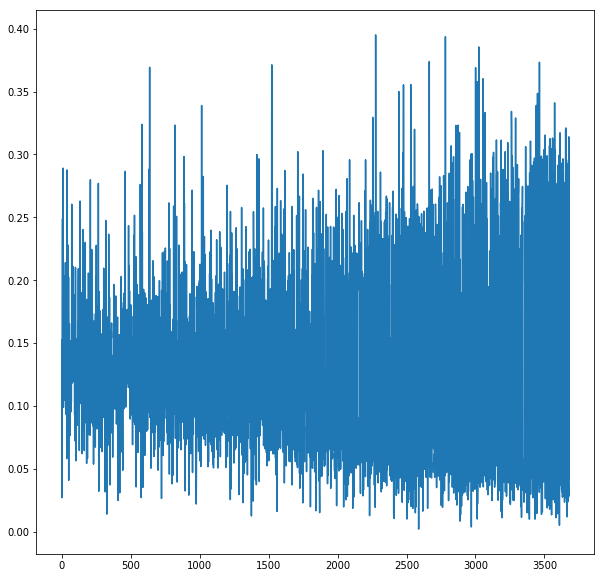

In [293]:
plt.figure(figsize=(10,10))
plt.plot(range(len(X_train)), loss_values)